#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

#Importing Data

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

#About Data

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Combination Variable    200 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)      int64
Combination Variable      float64
dtype: object

#Data Visualization

In [ ]:
sum_male = 0
sum_female = 0
no_male = 0
no_female = 0

for i in range(len(df["Spending Score (1-100)"])):
  if df["Gender"][i] == "Male":
    sum_male = sum_male + df["Spending Score (1-100)"][i]
    no_male = no_male + 1
  else:
    sum_female = sum_female + df["Spending Score (1-100)"][i]
    no_female = no_female + 1

avg_male = sum_male/no_male
avg_female = sum_female/no_female

In [ ]:
avg_male, avg_female

(48.51136363636363, 51.526785714285715)

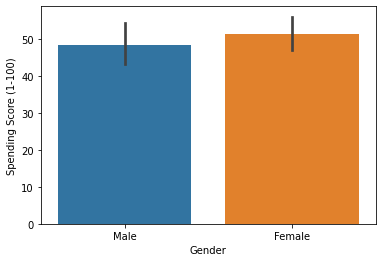

In [ ]:
sns.barplot(x=df['Gender'],y=df['Spending Score (1-100)'],data=df)

As Male or Female, The gender average spending is same nearly, Gender is not considered as a variable for Spending Score label.

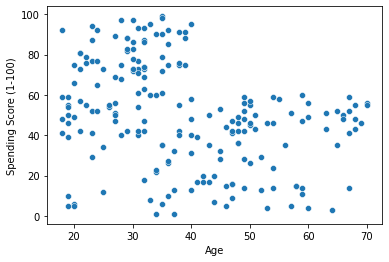

In [ ]:
sns.scatterplot(x = df["Age"], y = df["Spending Score (1-100)"])

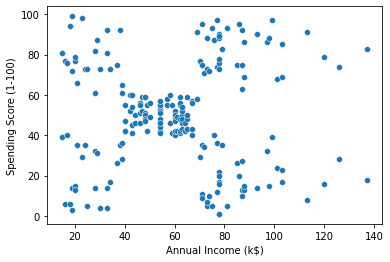

In [ ]:
sns.scatterplot(x = df["Annual Income (k$)"], y = df["Spending Score (1-100)"])

In [ ]:
i = 1
j = 0
while i >= 0:
  ti = "Annual Income: "+ str(round(i,2)) + " & " + "Age: " + str(round(j,2))
  plt.figure(figsize= (6,6))
  plt.title(ti)
  plt.ylabel("Spending Score (1-100)")
  plt.xlabel("Annual Income & Age")
  sns.scatterplot(x = i*df["Annual Income (k$)"] + j*df["Age"], y = df["Spending Score (1-100)"])
  plt.plot()
  i = i - 0.1
  j = j + 0.1

From Graphs The best Spread of points occur when weights are distributed for as Annual Income : 0.6 and Age: 0.4

In [ ]:
df["Combination Variable"] = 0.6*df["Annual Income (k$)"] + 0.4*df["Age"]

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Combination Variable
0,1,Male,19,15,39,16.6
1,2,Male,21,15,81,17.4
2,3,Female,20,16,6,17.6
3,4,Female,23,16,77,18.8
4,5,Female,31,17,40,22.6


In [ ]:
X = df.drop(["CustomerID","Gender", "Age", "Annual Income (k$)"], axis = 1)

In [ ]:
X.head()

,Spending Score (1-100),Combination Variable
0,39,16.6
1,81,17.4
2,6,17.6
3,77,18.8
4,40,22.6


#Finding the number of clusters using Elbow Method or Within Cluster Sum of Sqaures

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

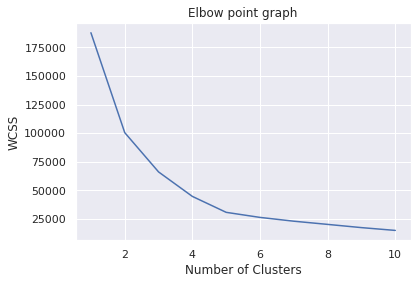

In [ ]:
#plot elbow plot

sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow point graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Number Of Clusters can be taken as 5 as the point is the optimum as visualized in the Elbow Point Graph

#KMeans Using 5 clusters and k-means++ initialization

In [ ]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)

y = kmeans.fit_predict(X)
print(y)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 2 4 2 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

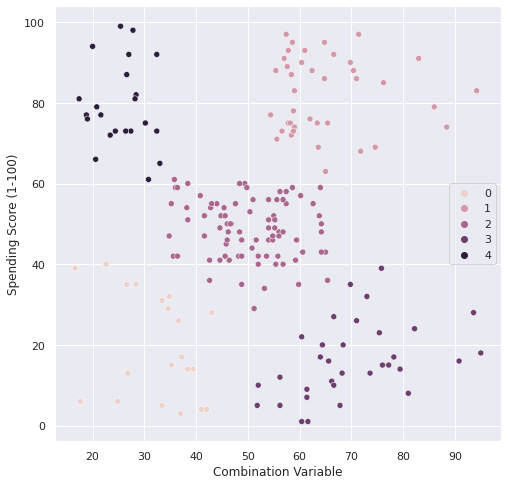

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(X["Combination Variable"],X["Spending Score (1-100)"], hue = y)
plt.plot()

Inference: Through the combined Variable of both Age and Income we can Distinguish/divide/segment the variable points that belong to a group. So when a new data point is seen we can place it in a cluster it belongs to based on the algorithm. 